In [1]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 构建线性回归模型

In [2]:
# 读取示例数据
data = pd.read_csv("../DataAnalysis/hypothesis/03/house_price_simple.csv")
data

,面积,卧室数,厕所数,所在城市,价格
0,957.2,2,1,C,397300
1,1998.7,3,1,B,719500
2,1641.5,4,3,B,628300
3,746.9,2,2,D,359300
4,1210.7,3,1,D,487500
...,...,...,...,...,...
995,1817.4,4,2,C,680100
996,2035.0,2,2,A,705000
997,1045.3,3,3,B,454400
998,1735.1,2,3,A,629300


In [3]:
# 为data的“所在城市”分类变量创建虚拟变量，并指定虚拟变量类型为整数，且删除掉第一个虚拟变量
data = pd.get_dummies(data, columns=["所在城市"], dtype = int, drop_first = True)
data

,面积,卧室数,厕所数,价格,所在城市_B,所在城市_C,所在城市_D
0,957.2,2,1,397300,0,1,0
1,1998.7,3,1,719500,1,0,0
2,1641.5,4,3,628300,1,0,0
3,746.9,2,2,359300,0,0,1
4,1210.7,3,1,487500,0,0,1
...,...,...,...,...,...,...,...
995,1817.4,4,2,680100,0,1,0
996,2035.0,2,2,705000,0,0,0
997,1045.3,3,3,454400,1,0,0
998,1735.1,2,3,629300,0,0,0


In [4]:
# 创建构建线性回归模型所需的因变量和自变量
y = data["价格"]
x = data.drop("价格", axis = 1)

In [5]:
# 查看X里所有变量之间的相关系数，并求绝对值

# x["面积"].corr(x["卧室数"])

x.corr()

,面积,卧室数,厕所数,所在城市_B,所在城市_C,所在城市_D
面积,1.000000,-0.047081,0.004138,0.008722,0.036042,-0.029804
卧室数,-0.047081,1.000000,0.002197,0.009218,0.003517,0.026641
厕所数,0.004138,0.002197,1.000000,-0.024887,0.020576,-0.000202
所在城市_B,0.008722,0.009218,-0.024887,1.000000,-0.348452,-0.322664
所在城市_C,0.036042,0.003517,0.020576,-0.348452,1.000000,-0.337299
所在城市_D,-0.029804,0.026641,-0.000202,-0.322664,-0.337299,1.000000


In [6]:
# 查看X里所有变量之间的相关系数，并求绝对值
x.corr().abs()

,面积,卧室数,厕所数,所在城市_B,所在城市_C,所在城市_D
面积,1.000000,0.047081,0.004138,0.008722,0.036042,0.029804
卧室数,0.047081,1.000000,0.002197,0.009218,0.003517,0.026641
厕所数,0.004138,0.002197,1.000000,0.024887,0.020576,0.000202
所在城市_B,0.008722,0.009218,0.024887,1.000000,0.348452,0.322664
所在城市_C,0.036042,0.003517,0.020576,0.348452,1.000000,0.337299
所在城市_D,0.029804,0.026641,0.000202,0.322664,0.337299,1.000000


In [7]:
# 这一步是为了下面绘图做准备，由于DataFrame的列名为中文，MatPlotlib的字体无法直接展示，需要替换字体
import matplotlib
# 把图表默认的字体替换成Heiti TC字体（你的系统上不一定有这个字体，如果没有的话需要替换成其它的）
matplotlib.rc("font",family='Heiti TC')

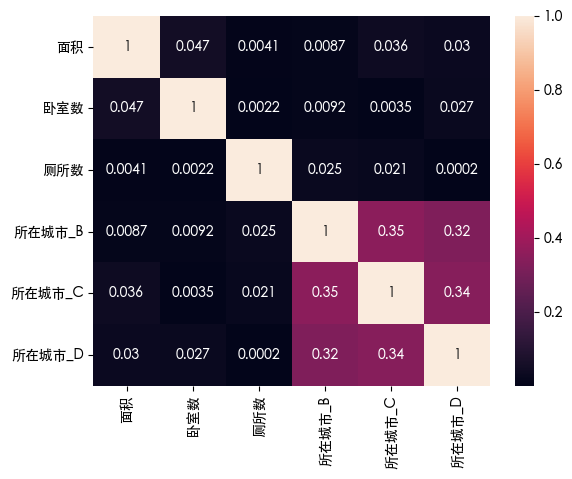

In [8]:
# 对X里所有变量之间的相关系数的绝对值绘制热力图
sns.heatmap(x.corr().abs(), annot=True)
plt.show()
# plt.plot()

In [9]:
# 在自变量里添加一个常量（为了引入截距）
x = sm.add_constant(x)


In [10]:
# 构建线性回归模型，并进行数据拟合
result = sm.OLS(y, x).fit()

# 输出拟合结果
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     价格   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 7.766e+04
Date:                Tue, 31 Dec 2024   Prob (F-statistic):               0.00
Time:                        00:37:15   Log-Likelihood:                -10262.
No. Observations:                1000   AIC:                         2.054e+04
Df Residuals:                     993   BIC:                         2.057e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.824e+04   1383.024     49.341      0.000    6.55e+04     7.1e+04
面积           299.7279      0.440    680.850      0.000     298.864     300.592
卧室数         8365.4726    270.523     30.923      0.000    7834.610    8896.335
厕所数         1.131e+04    394.998     28.640      0.000    1.05e+04    1.21e+04
所在城市_B      4250.1208    625.407      6.796      0.000    3022.850    5477.391
所在城市_C      9213.1877    615.594     14.966      0.000    8005.173    1.04e+04
所在城市_D      1.506e+04    633.226     23.779      0.000    1.38e+04    1.63e+04
==============================================================================
Omnibus:                        4.096   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.129   Jarque-Bera (JB):                3.538
Skew:                          -0.066   Prob(JB):                        0.170
Kurtosis:                       2.740   Cond. No.                     1.02e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 预测新数据

In [11]:
# 读取用于预测的示例数据
new_observation = pd.read_csv("../DataAnalysis/hypothesis/03/house_price_predict_simple.csv")
new_observation

,面积,卧室数,厕所数,所在城市
0,957.2,2,2,C
1,1998.7,2,2,C
2,1641.5,4,1,C
3,746.9,2,2,C
4,1210.7,2,1,B
5,2325.7,2,1,C
6,286.7,4,2,A
7,1285.5,4,1,D
8,2133.0,3,1,D
9,1066.6,3,1,D


In [12]:
# 把new_observation的“所在城市”列转换为包含'A'、'B'、'C'、'D'类别的分类变量
new_observation["所在城市"] =  pd.Categorical(new_observation["所在城市"], categories=["A","B","C","D"])
new_observation

,面积,卧室数,厕所数,所在城市
0,957.2,2,2,C
1,1998.7,2,2,C
2,1641.5,4,1,C
3,746.9,2,2,C
4,1210.7,2,1,B
5,2325.7,2,1,C
6,286.7,4,2,A
7,1285.5,4,1,D
8,2133.0,3,1,D
9,1066.6,3,1,D


In [13]:
# 为new_observation的“所在城市”分类变量创建虚拟变量，并指定虚拟变量类型为整数，且删除掉第一个虚拟变量
new_observation = pd.get_dummies(new_observation, columns=["所在城市"],dtype = int, drop_first = True)
new_observation

,面积,卧室数,厕所数,所在城市_B,所在城市_C,所在城市_D
0,957.2,2,2,0,1,0
1,1998.7,2,2,0,1,0
2,1641.5,4,1,0,1,0
3,746.9,2,2,0,1,0
4,1210.7,2,1,1,0,0
5,2325.7,2,1,0,1,0
6,286.7,4,2,0,0,0
7,1285.5,4,1,0,0,1
8,2133.0,3,1,0,0,1
9,1066.6,3,1,0,0,1


In [18]:
# 在new_observation里添加一个常量（为了引入截距）
new_observation = sm.add_constant(new_observation)
new_observation

,const,面积,卧室数,厕所数,所在城市_B,所在城市_C,所在城市_D
0,1.0,957.2,2,2,0,1,0
1,1.0,1998.7,2,2,0,1,0
2,1.0,1641.5,4,1,0,1,0
3,1.0,746.9,2,2,0,1,0
4,1.0,1210.7,2,1,1,0,0
5,1.0,2325.7,2,1,0,1,0
6,1.0,286.7,4,2,0,0,0
7,1.0,1285.5,4,1,0,0,1
8,1.0,2133.0,3,1,0,0,1
9,1.0,1066.6,3,1,0,0,1


In [20]:
# 利用前面的线性回归模型，把new_observation作为自变量进行预测
predicted_value = result.predict(new_observation)
predicted_value

0    403709.343688
1    715875.928746
2    614231.460486
3    340676.570920
4    463414.678539
5    802574.329486
6    210259.558968
7    513372.336330
8    759026.240430
9    439396.431206
dtype: float64